# Метод k-ближайших соседей (k-nearest neighbors algorithm)

## Задание 1
Реализуйте алгоритм K ближайших соседей для классификации. 
- Создайте искуственный набор данных из 100 наблюдений с 3 классами.
- Реализуйте функцию, которая получает на вход тренировочный и тестовый наборы данных и $k$ - количество ближайших соседей, и возвращает метки тестового набора данных
- Используйте евклидову меру
- Если возникает неопределенность (например, все три соседа имею разные метки классов), то присвойте класс случайным образом
- Проверьте качество классификации для различных параметров $k$ (1, 3, 5, 7, 9) метрикой Accuracy (доля правильных ответов)
- Постройте разделающие поверхности классификатора

**Алгоритм К-ближайших соседей:**

Для каждого объекта тестового набора данных:
1. вычисление расстояний между всеми объектами тренировочного набора;
2. определение $k$ наименьших расстояний;
3. определение классов для $k$ найденных объектов;
4. присваивание метки тестовому объекту класса, который превалирует среди найденных объектов.

In [164]:
from sklearn.datasets import make_blobs
from random import choice
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np
import math
import pandas as pd
from sklearn.metrics import accuracy_score

Дано 3 класса:

In [165]:
num_labels = 3
X, y = make_blobs(n_samples=100, centers=num_labels, n_features=2, cluster_std = 2, random_state=17)

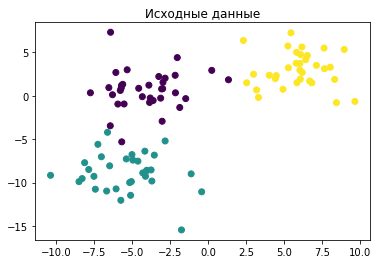

In [166]:
plt.scatter(X[:,0], X[:,1], c=y)
plt.title('Исходные данные');

In [167]:
class KNeighborsClassifier(object):
    
    def __init__(self, k_neighbors):
        self.k_neighbors = k_neighbors
    
    def fit(self, train_data, train_data_labels):
        self.train_data = train_data
        self.train_data_labels = train_data_labels
        
    def predict(self, test_data):
        predicted_labels = []
        for obj in test_data:
            category = self._find_neighboring_points(obj)
            cat_count = {}
            for metka in category:
                if (metka in cat_count):
                    cat_count[metka] += 1
                else:
                    cat_count[metka] = 1 
            Max = max(cat_count.values())
            m = []
            for key in cat_count:
                if cat_count[key] == Max:
                    m.append(key);
            predicted_labels.append(choice(m));
        return np.array(predicted_labels)
    
    def _find_neighboring_points (self, obj):
        distances = []        
        for index, train_point in enumerate(self.train_data):
            sum = (obj[0] - train_point[0])**2 + (obj[1] - train_point[1])**2
            distances.append([index, math.sqrt(sum)])

        distances = sorted(distances, key = lambda x: x[1])
        category = []
        for i in range(self.k_neighbors):
            category.append(self.train_data_labels[distances[i][0]]) 
        return category


In [168]:
X_train = X[:70]
y_train = y[:70]
X_test = X[70:]
y_test = y[70:]

In [169]:
def draw_class_border(clf, h=.03, cmap=plt.cm.coolwarm):
    x_min, x_max = np.min(clf.train_data[:,0]) - 1, np.max(clf.train_data[:,0]) + 1
    y_min, y_max = np.min(clf.train_data[:,1]) - 1, np.max(clf.train_data[:,1]) + 1

    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                           np.arange(y_min, y_max, h))

    Z = clf.predict(np.vstack((xx.ravel(), yy.ravel())).transpose())
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(7,7))
    plt.contourf(xx, yy, Z, cmap=cmap, alpha=.5)
    plt.scatter(clf.train_data[:,0], clf.train_data[:,1], s=200, c = clf.train_data_labels, cmap=cmap)
    plt.title(f"k = {clf.k_neighbors}")
    plt.show()

K = 1, Присвоенные классы: [1 2 1 1 1 2 1 0 0 0 0 1 2 2 2 2 2 0 2 2 0 2 2 0 0 2 0 2 1 0]


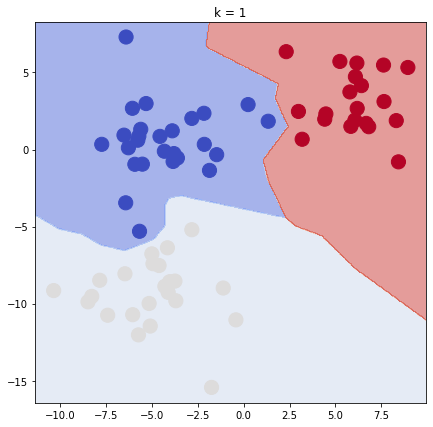

K = 3, Присвоенные классы: [1 2 1 1 1 2 1 0 0 0 0 1 2 2 2 2 2 0 2 2 0 2 2 0 0 2 0 2 1 0]


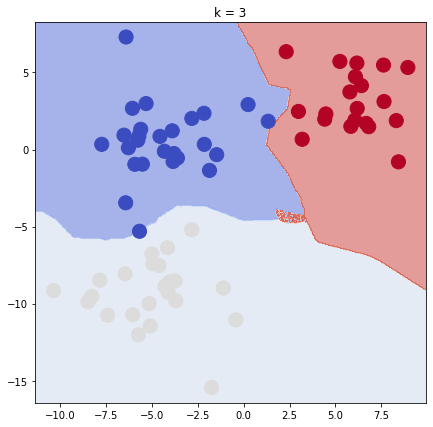

K = 5, Присвоенные классы: [1 2 1 1 1 2 1 1 0 0 0 1 2 2 2 2 2 0 2 2 0 2 2 0 0 2 0 2 1 0]


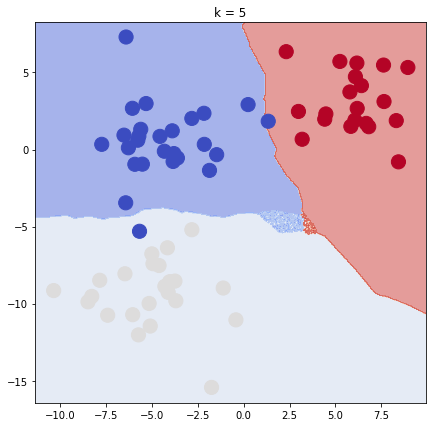

K = 7, Присвоенные классы: [1 2 1 1 1 2 1 1 0 0 0 1 2 2 2 2 2 0 2 2 0 2 2 0 0 2 0 2 1 0]


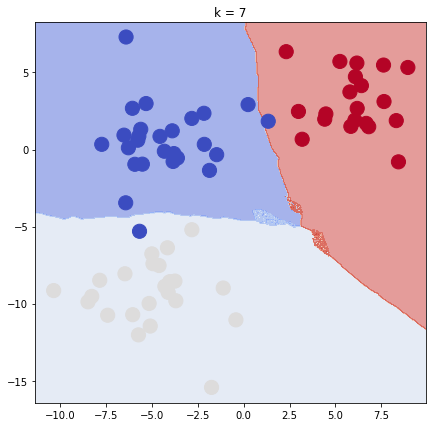

K = 9, Присвоенные классы: [1 2 1 1 1 2 1 1 1 0 0 1 2 2 2 2 2 0 2 2 0 2 2 0 0 2 0 2 1 0]


In [ ]:
df = pd.DataFrame({'k':[1,3,5,7,9]})
L = []
for k in range(1, 10, 2):
    clf = KNeighborsClassifier(k)
    clf.fit(X_train, y_train)
    y_predicted = clf.predict(X_test)
    print(f"K = {k}, Присвоенные классы: {y_predicted}")
    L.append(accuracy_score(y_test, y_predicted))
    draw_class_border(clf, h=.05)
df['Accuracy'] = L
df